In [1]:
import numpy as np
import pandas as pd
import string
from sklearn.linear_model import LogisticRegression

In [2]:
products=pd.read_csv('C:/Users/gero_/Documents/python works/fuentes/amazon_baby_subset.csv')

In [3]:
products = products.fillna({'review':''})

In [5]:
import json
with open('C:/Users/gero_/Documents/python works/fuentes/important_words.json') as archivo:
    important_words=json.load(archivo)
archivo.close()

In [6]:
len(important_words)

193

In [7]:
def remove_punctuation(text:str):
   import string
   for i in text:
      if i in string.punctuation:
         text=text.replace(i,'')
         
   return str(text)

In [8]:
products['review_clean']=products['review'].apply(lambda x :remove_punctuation(str(x)))

In [9]:
for word in important_words:
    products[word]=products['review_clean'].apply(lambda x : x.split().count(word))

C:\Users\gero_\AppData\Local\Temp\ipykernel_16588\2345936920.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  products[word]=products['review_clean'].apply(lambda x : x.split().count(word))
C:\Users\gero_\AppData\Local\Temp\ipykernel_16588\2345936920.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  products[word]=products['review_clean'].apply(lambda x : x.split().count(word))
C:\Users\gero_\AppData\Local\Temp\ipykernel_16588\2345936920.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result o

In [10]:
products.head(10)

,name,review,rating,sentiment,review_clean,baby,one,great,love,use,...,seems,picture,completely,wish,buying,babies,won,tub,almost,either
0,Stop Pacifier Sucking without tears with Thumb...,All of my kids have cried non-stop when I trie...,5,1,All of my kids have cried nonstop when I tried...,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Nature's Lullabies Second Year Sticker Calendar,We wanted to get something to keep track of ou...,5,1,We wanted to get something to keep track of ou...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Nature's Lullabies Second Year Sticker Calendar,My daughter had her 1st baby over a year ago. ...,5,1,My daughter had her 1st baby over a year ago S...,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,"Lamaze Peekaboo, I Love You","One of baby's first and favorite books, and it...",4,1,One of babys first and favorite books and it i...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,SoftPlay Peek-A-Boo Where's Elmo A Children's ...,Very cute interactive book! My son loves this ...,5,1,Very cute interactive book My son loves this b...,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
5,Our Baby Girl Memory Book,"Beautiful book, I love it to record cherished ...",5,1,Beautiful book I love it to record cherished t...,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
6,Hunnt&reg; Falling Flowers and Birds Kids Nurs...,"Try this out for a spring project !Easy ,fun a...",5,1,Try this out for a spring project Easy fun and...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,Blessed By Pope Benedict XVI Divine Mercy Full...,very nice Divine Mercy Pendant of Jesus now on...,5,1,very nice Divine Mercy Pendant of Jesus now on...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,Cloth Diaper Pins Stainless Steel Traditional ...,We bought the pins as my 6 year old Autistic s...,4,1,We bought the pins as my 6 year old Autistic s...,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
9,Cloth Diaper Pins Stainless Steel Traditional ...,It has been many years since we needed diaper ...,5,1,It has been many years since we needed diaper ...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
import json

# Leer el archivo JSON con los índices
with open('C:/Users/gero_/Documents/python works/fuentes/module-4-assignment-train-idx.json', 'r') as file:
    indices_train = json.load(file)
file.close()

In [12]:
# Leer el archivo JSON con los índices
with open('C:/Users/gero_/Documents/python works/fuentes/module-4-assignment-validation-idx.json', 'r') as file:
    indices_validation = json.load(file)
file.close()

In [13]:
train_data=products.iloc[indices_train]
validation_data=products.iloc[indices_validation]

In [14]:
def get_numpy_data(dataframe,features,target):
    dataframe['constant']=1
    features=['constant']+features
    features_temp=dataframe[features]
    features_matrix=np.matrix(features_temp)

    df_target=dataframe[target]
    arr_target=np.matrix(df_target)
    return (features_matrix,arr_target)


In [15]:
feature_matrix_train, sentiment_train = get_numpy_data(train_data, important_words, 'sentiment')
feature_matrix_valid, sentiment_valid = get_numpy_data(validation_data, important_words, 'sentiment') 

C:\Users\gero_\AppData\Local\Temp\ipykernel_16588\3131107051.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dataframe['constant']=1
C:\Users\gero_\AppData\Local\Temp\ipykernel_16588\3131107051.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['constant']=1
C:\Users\gero_\AppData\Local\Temp\ipykernel_16588\3131107051.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at onc

In [16]:
def predict_probability (feature_matrix,weights):
    score=np.matrix(feature_matrix)*np.transpose(np.matrix(weights))
    #devuelve una matriz [D,1]
    return 1/( 1+ np.exp( -score ) )

In [17]:
def compute_log_likelihood_with_L2(feature_matrix, sentiment, coefficients,l2_penalty):
    indicator=np.transpose(np.matrix(np.where(np.array(sentiment)>0 ,1,0) ))
    scores = np.matrix(feature_matrix)*np.transpose(np.matrix(coefficients))
    #func1=np.vectorize(lambda x : np.log(1+ np.exp(-x)))
    #lp=np.multiply(indicator-1,scores)-func1(scores)
    lp=np.multiply(indicator-1,scores)-np.log(1+ np.exp(-scores))
    # compute_log_likelihood([[1 ,2 ,3],[3 ,4 ,5]],[1,-1],[4,5,6])
    return np.sum(lp)-(l2_penalty*np.sum(np.pow(np.matrix(coefficients),2)))

In [18]:
def logistic_regression_with_L2(feature_matrix, sentiment, initial_coefficients, step_size,l2_penalty,max_iter):
    coefficients=np.matrix(initial_coefficients)
    for itr in range(max_iter):
        predictions=predict_probability(feature_matrix,coefficients)
        indicator=np.transpose(np.matrix(np.where(np.array(sentiment)>0 ,1,0) ))
        errors=indicator-predictions

        derivative=np.transpose(feature_matrix)*errors #matiz[D,1]
        restriction=np.concatenate( (np.matrix([0]),coefficients[0,1:]) ,axis=1)
        coefficients=coefficients + step_size*(np.transpose(derivative)-2*l2_penalty*restriction)
        if itr <= 15 or (itr <= 100 and itr % 10 == 0) or (itr <= 1000 and itr % 100 == 0) \
        or (itr <= 10000 and itr % 1000 == 0) or itr % 10000 == 0:
            lp = compute_log_likelihood_with_L2(feature_matrix, sentiment, coefficients,l2_penalty)
            print ('iteration %*d: log likelihood of observed labels = %.8f' % \
                (int(np.ceil(np.log10(max_iter))), itr, lp))
    return coefficients
        

In [19]:
initial_weight=np.zeros(194)

In [20]:
coefficients_0_penalty=logistic_regression_with_L2(feature_matrix_train,sentiment_train,initial_weight,5e-6,0,501)

iteration   0: log likelihood of observed labels = -29179.39138303
iteration   1: log likelihood of observed labels = -29003.71259047
iteration   2: log likelihood of observed labels = -28834.66187288
iteration   3: log likelihood of observed labels = -28671.70781507
iteration   4: log likelihood of observed labels = -28514.43078198
iteration   5: log likelihood of observed labels = -28362.48344665
iteration   6: log likelihood of observed labels = -28215.56713122
iteration   7: log likelihood of observed labels = -28073.41743783
iteration   8: log likelihood of observed labels = -27935.79536396
iteration   9: log likelihood of observed labels = -27802.48168669
iteration  10: log likelihood of observed labels = -27673.27331484
iteration  11: log likelihood of observed labels = -27547.98083656
iteration  12: log likelihood of observed labels = -27426.42679977
iteration  13: log likelihood of observed labels = -27308.44444728
iteration  14: log likelihood of observed labels = -27193.8767

In [21]:
coefficients_4_penalty=logistic_regression_with_L2(feature_matrix_train,sentiment_train,initial_weight,5e-6,4,501)

iteration   0: log likelihood of observed labels = -29179.39508220
iteration   1: log likelihood of observed labels = -29003.73417518
iteration   2: log likelihood of observed labels = -28834.71442992
iteration   3: log likelihood of observed labels = -28671.80347713
iteration   4: log likelihood of observed labels = -28514.58082967
iteration   5: log likelihood of observed labels = -28362.69838615
iteration   6: log likelihood of observed labels = -28215.85675770
iteration   7: log likelihood of observed labels = -28073.79089002
iteration   8: log likelihood of observed labels = -27936.26117277
iteration   9: log likelihood of observed labels = -27803.04781943
iteration  10: log likelihood of observed labels = -27673.94721575
iteration  11: log likelihood of observed labels = -27548.76946425
iteration  12: log likelihood of observed labels = -27427.33666176
iteration  13: log likelihood of observed labels = -27309.48163191
iteration  14: log likelihood of observed labels = -27195.0469

In [22]:
coefficients_10_penalty=logistic_regression_with_L2(feature_matrix_train,sentiment_train,initial_weight,5e-6,10,501)

iteration   0: log likelihood of observed labels = -29179.40063095
iteration   1: log likelihood of observed labels = -29003.76655006
iteration   2: log likelihood of observed labels = -28834.79325488
iteration   3: log likelihood of observed labels = -28671.94694140
iteration   4: log likelihood of observed labels = -28514.80584116
iteration   5: log likelihood of observed labels = -28363.02068822
iteration   6: log likelihood of observed labels = -28216.29102461
iteration   7: log likelihood of observed labels = -28074.35080906
iteration   8: log likelihood of observed labels = -27936.95951745
iteration   9: log likelihood of observed labels = -27803.89651595
iteration  10: log likelihood of observed labels = -27674.95740407
iteration  11: log likelihood of observed labels = -27549.95155435
iteration  12: log likelihood of observed labels = -27428.70038563
iteration  13: log likelihood of observed labels = -27311.03609159
iteration  14: log likelihood of observed labels = -27196.8006

In [23]:
coefficients_1e2_penalty=logistic_regression_with_L2(feature_matrix_train,sentiment_train,initial_weight,5e-6,1e2,501)

iteration   0: log likelihood of observed labels = -29179.48386225
iteration   1: log likelihood of observed labels = -29004.25185888
iteration   2: log likelihood of observed labels = -28835.97410517
iteration   3: log likelihood of observed labels = -28674.09476156
iteration   4: log likelihood of observed labels = -28518.17238064
iteration   5: log likelihood of observed labels = -28367.83981791
iteration   6: log likelihood of observed labels = -28222.78021127
iteration   7: log likelihood of observed labels = -28082.71238613
iteration   8: log likelihood of observed labels = -27947.38181741
iteration   9: log likelihood of observed labels = -27816.55489892
iteration  10: log likelihood of observed labels = -27690.01520144
iteration  11: log likelihood of observed labels = -27567.56093818
iteration  12: log likelihood of observed labels = -27449.00317089
iteration  13: log likelihood of observed labels = -27334.16447646
iteration  14: log likelihood of observed labels = -27222.8779

In [24]:
coefficients_1e3_penalty=logistic_regression_with_L2(feature_matrix_train,sentiment_train,initial_weight,5e-6,1e3,501)

iteration   0: log likelihood of observed labels = -29180.31617526
iteration   1: log likelihood of observed labels = -29009.07260422
iteration   2: log likelihood of observed labels = -28847.62661362
iteration   3: log likelihood of observed labels = -28695.15095785
iteration   4: log likelihood of observed labels = -28550.96299049
iteration   5: log likelihood of observed labels = -28414.47813280
iteration   6: log likelihood of observed labels = -28285.18191369
iteration   7: log likelihood of observed labels = -28162.61277051
iteration   8: log likelihood of observed labels = -28046.35112848
iteration   9: log likelihood of observed labels = -27936.01218790
iteration  10: log likelihood of observed labels = -27831.24093409
iteration  11: log likelihood of observed labels = -27731.70850491
iteration  12: log likelihood of observed labels = -27637.10940782
iteration  13: log likelihood of observed labels = -27547.15928610
iteration  14: log likelihood of observed labels = -27461.5930

In [25]:
coefficients_1e5_penalty=logistic_regression_with_L2(feature_matrix_train,sentiment_train,initial_weight,5e-6,1e5,501)

iteration   0: log likelihood of observed labels = -29271.87060678
iteration   1: log likelihood of observed labels = -29271.79437591
iteration   2: log likelihood of observed labels = -29271.85698455
iteration   3: log likelihood of observed labels = -29271.97150743
iteration   4: log likelihood of observed labels = -29272.12484805
iteration   5: log likelihood of observed labels = -29272.31184540
iteration   6: log likelihood of observed labels = -29272.52672514
iteration   7: log likelihood of observed labels = -29272.76471749
iteration   8: log likelihood of observed labels = -29273.02152421
iteration   9: log likelihood of observed labels = -29273.29337512
iteration  10: log likelihood of observed labels = -29273.57694784
iteration  11: log likelihood of observed labels = -29273.86932677
iteration  12: log likelihood of observed labels = -29274.16795888
iteration  13: log likelihood of observed labels = -29274.47061557
iteration  14: log likelihood of observed labels = -29274.7753

In [26]:
def weigth_words(significant_words,weights,order):
    words_coef= dict()
    for ii,jj in zip(significant_words,weights):
        words_coef[ii]=jj
    if order=='asc':
        return sorted(words_coef.items(), key=lambda item: item[1],reverse=False)
    elif order=='desc':
        return sorted(words_coef.items(), key=lambda item: item[1],reverse=True)
    else:
        return print('Ingrese el parametro orden correctamente')

In [27]:
weigth_words(important_words,np.transpose(coefficients_0_penalty)[1:],'desc')[:5]
#tener en cuenta no tomar el primer coeficiente ya que corresponde al termino independiente 

[('love', matrix([[1.05855398]])),
 ('loves', matrix([[1.05248405]])),
 ('easy', matrix([[0.98455882]])),
 ('perfect', matrix([[0.83569321]])),
 ('great', matrix([[0.80162499]]))]

In [28]:
weigth_words(important_words,np.transpose(coefficients_0_penalty)[1:],'asc')[:5]
#tener en cuenta no tomar el primer coeficiente ya que corresponde al termino independiente 

[('disappointed', matrix([[-0.95543663]])),
 ('money', matrix([[-0.76879313]])),
 ('return', matrix([[-0.74208495]])),
 ('waste', matrix([[-0.61780918]])),
 ('returned', matrix([[-0.57270705]]))]

In [33]:
positive_words=list()
for ii in range(0,5):
    positive_words.append (weigth_words(important_words,np.transpose(coefficients_0_penalty)[1:],'desc')[:5][ii][0])

In [35]:
negative_words=list()
for ii in range(0,5):
    negative_words.append (weigth_words(important_words,np.transpose(coefficients_0_penalty)[1:],'asc')[:5][ii][0])

In [46]:
table=pd.DataFrame()

In [47]:
table['word']=['(intercept)']+important_words

In [72]:
table['coefficients_0_penalty']=np.array(coefficients_0_penalty)[0]
table['coefficients_4_penalty']=np.array(coefficients_4_penalty)[0]
table['coefficients_10_penalty']=np.array(coefficients_10_penalty)[0]
table['coefficients_1e2_penalty']=np.array(coefficients_1e2_penalty)[0]
table['coefficients_1e3_penalty']=np.array(coefficients_1e3_penalty)[0]
table['coefficients_1e5_penalty']=np.array(coefficients_1e5_penalty)[0]

In [86]:
table_red=table[table['word'].isin(positive_words+negative_words)]

In [87]:
table_red

,word,coefficients_0_penalty,coefficients_4_penalty,coefficients_10_penalty,coefficients_1e2_penalty,coefficients_1e3_penalty,coefficients_1e5_penalty
3,great,0.801625,0.796897,0.789935,0.701425,0.376012,0.008950
4,love,1.058554,1.050856,1.039529,0.896644,0.418354,0.009042
8,easy,0.984559,0.977600,0.967362,0.838245,0.401904,0.008808
23,loves,1.052484,1.043903,1.031265,0.870794,0.345870,0.006150
34,perfect,0.835693,0.828555,0.818038,0.684143,0.250614,0.003989
97,money,-0.768793,-0.762734,-0.753818,-0.641406,-0.275883,-0.005487
106,disappointed,-0.955437,-0.946980,-0.934518,-0.775625,-0.266095,-0.004013
113,waste,-0.617809,-0.612475,-0.604620,-0.505189,-0.190631,-0.003345
114,return,-0.742085,-0.735502,-0.725807,-0.602646,-0.215199,-0.003730
169,returned,-0.572707,-0.567518,-0.559870,-0.462056,-0.150021,-0.002225


<>:30: SyntaxWarning: invalid escape sequence '\l'
<>:30: SyntaxWarning: invalid escape sequence '\l'
C:\Users\gero_\AppData\Local\Temp\ipykernel_16588\1674268399.py:30: SyntaxWarning: invalid escape sequence '\l'
  plt.xlabel('L2 penalty ($\lambda$)')


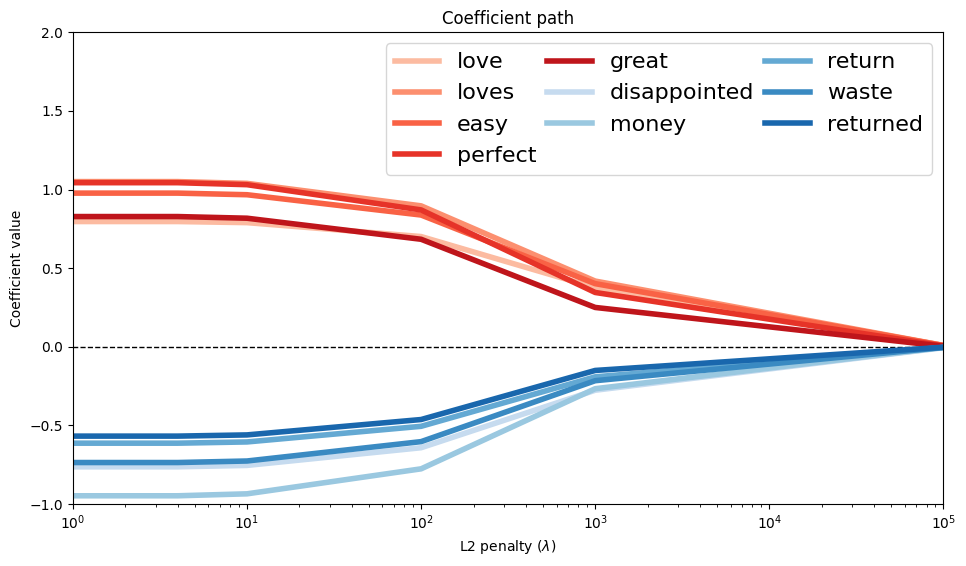

In [92]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = 10, 6

def make_coefficient_plot(table, positive_words, negative_words, l2_penalty_list):
    cmap_positive = plt.get_cmap('Reds')
    cmap_negative = plt.get_cmap('Blues')
    
    xx = l2_penalty_list
    plt.plot(xx, [0.]*len(xx), '--', lw=1, color='k')
    
    table_positive_words = table[table['word'].isin(positive_words)]
    table_negative_words = table[table['word'].isin(negative_words)]
    del table_positive_words['word']
    del table_negative_words['word']
    
    for i in range(len(positive_words)):
        color = cmap_positive(0.8*((i+1)/(len(positive_words)*1.2)+0.15))
        plt.plot(xx, table_positive_words[i:i+1].to_numpy().flatten(),
                 '-', label=positive_words[i], linewidth=4.0, color=color)
        
    for i in range(len(negative_words)):
        color = cmap_negative(0.8*((i+1)/(len(negative_words)*1.2)+0.15))
        plt.plot(xx, table_negative_words[i:i+1].to_numpy().flatten(),
                 '-', label=negative_words[i], linewidth=4.0, color=color)
        
    plt.legend(loc='best', ncol=3, prop={'size':16}, columnspacing=0.5)
    plt.axis([1, 1e5, -1, 2])
    plt.title('Coefficient path')
    plt.xlabel('L2 penalty ($\lambda$)')
    plt.ylabel('Coefficient value')
    plt.xscale('log')
    plt.rcParams.update({'font.size': 18})
    plt.tight_layout()


make_coefficient_plot(table_red, positive_words, negative_words, l2_penalty_list=[0, 4, 10, 1e2, 1e3, 1e5])


In [114]:
def accuracy_cal_mod1(feature_matrix,coefficients,target):
    scores = feature_matrix*np.transpose(coefficients)
    predictions=np.where(scores >0, 1,-1)
    cont=0
    for i,j in zip(np.transpose(predictions)[0],np.array(target)[0]):
        if i==j:
            cont=cont+1
    return cont/len(predictions)
    #print('predicciones correctas',cont)
    #print (cont/len(predictions))

Mas preciso en los datos de entrenamiento

In [130]:
arr1=dict()
for i in ['0', '4', '10', '1e2', '1e3', '1e5']:
    if i =='0':
        var1=coefficients_0_penalty
    elif i=='4':
        var1=coefficients_4_penalty
    elif i =='10':
        var1=coefficients_10_penalty
    elif i =='1e2':
        var1=coefficients_1e2_penalty
    elif i =='1e3':
        var1=coefficients_1e3_penalty
    else:
        var1=coefficients_1e5_penalty
    
    arr1[i]=accuracy_cal_mod1(feature_matrix_train,var1,sentiment_train)
for ii,jj in arr1.items():
    if jj==max(arr1.values()):
        print('restriccion l2 =',ii)
        print('accuracy',jj)
del arr1,i,ii,jj

restriccion l2 = 0
accuracy 0.7851561577866434


Mas preciso en los datos de validación

In [131]:
arr1=dict()
for i in ['0', '4', '10', '1e2', '1e3', '1e5']:
    if i =='0':
        var1=coefficients_0_penalty
    elif i=='4':
        var1=coefficients_4_penalty
    elif i =='10':
        var1=coefficients_10_penalty
    elif i =='1e2':
        var1=coefficients_1e2_penalty
    elif i =='1e3':
        var1=coefficients_1e3_penalty
    else:
        var1=coefficients_1e5_penalty
    
    arr1[i]=accuracy_cal_mod1(feature_matrix_valid,var1,sentiment_valid)
for ii,jj in arr1.items():
    if jj==max(arr1.values()):
        print('restriccion l2 =',ii)
        print('accuracy',jj)
del arr1,i,ii,jj

restriccion l2 = 10
accuracy 0.7817197273830642
